In [5]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint

In [6]:
gkey = os.environ.get("google_maps_key")

## Pulling top 50 trending videos on youtube ##

In [7]:
all_videos_url = f"https://www.googleapis.com/youtube/v3/videos?key={gkey}&maxResults=50&chart=mostPopular&regionCode=US&part=statistics,snippet"
all_response = requests.get(all_videos_url).json()

all_vid_list = all_response["items"]
all_vid_cat_list = []

for vid in all_vid_list:
    vid_category = vid["snippet"]["categoryId"]
    all_vid_cat_list.append(vid_category)

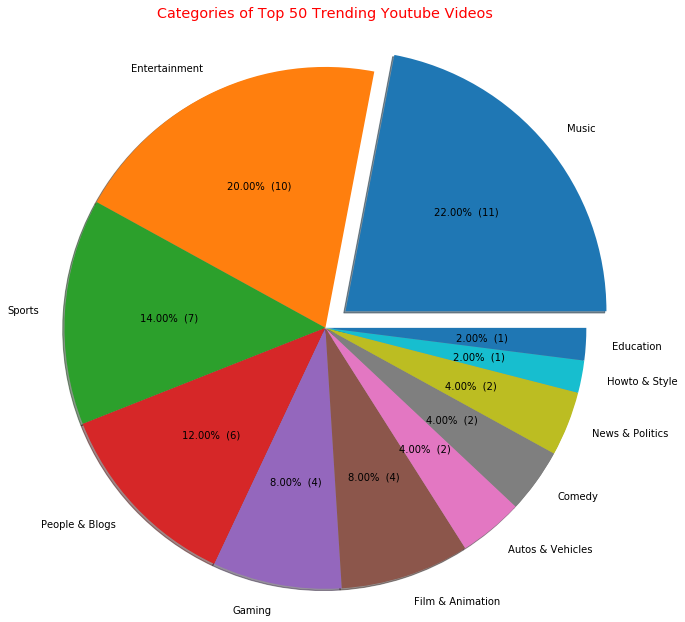

In [8]:
category_series = pd.Series(all_vid_cat_list)
pie_values = category_series.value_counts()
pie_labels = ["Music", "Entertainment", "Sports","People & Blogs", "Gaming", "Film & Animation", "Autos & Vehicles",
              "Comedy", "News & Politics", "Howto & Style", "Education"]

def make_autopct(pie_values):
    def my_autopct(pct):
        total = sum(pie_values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title("Categories of Top 50 Trending Youtube Videos", y=1.9, fontsize="x-large", color="red")
plt.pie(pie_values, labels=pie_labels, autopct= make_autopct(pie_values), radius=3, shadow = True, 
        explode = [0.3, 0,0,0,0,0,0,0,0,0,0])
plt.savefig("Category_PieChart.png", bbox_inches = "tight" )
plt.show()

### Out of all top 50 trending YouTube videos, the music category appears the most. This indicates that YouTube is a popular medium for music consumption. 

## Pulling top 50 trending music videos and their statistics ##

In [11]:
music_videos_url = f"https://www.googleapis.com/youtube/v3/videos?key={gkey}&maxResults=50&chart=mostPopular&videoCategoryId=10&regionCode=US&part=statistics,snippet"
response = requests.get(music_videos_url).json()

vid_list = response["items"]
vid_title_list = []
vid_viewcount_list = []
vid_likecount_list = []
vid_dislikecount_list = []
vid_commentcount_list = []
vid_release_date_list = []

for vid in vid_list:
    
    vid_title = vid["snippet"]["title"]
    vid_viewcount = vid["statistics"]["viewCount"]
    vid_likecount = vid["statistics"]["likeCount"]
    vid_dislikecount = vid["statistics"]["dislikeCount"]
    vid_commentcount= vid["statistics"]["commentCount"]
    vid_release_date = vid["snippet"]["publishedAt"]
    
    vid_title_list.append(vid_title)
    vid_viewcount_list.append(vid_viewcount)
    vid_likecount_list.append(vid_likecount)
    vid_dislikecount_list.append(vid_dislikecount)
    vid_commentcount_list.append(vid_commentcount)
    vid_release_date_list.append(vid_release_date)

In [13]:
music_videos_df = pd.DataFrame({"Name":vid_title_list, "View count": vid_viewcount_list, 
                                "Like count": vid_likecount_list, "Dislike count": vid_dislikecount_list,
                               "Comment count": vid_commentcount_list, "Release Date": vid_release_date_list})

music_videos_df["Release Date"] = music_videos_df["Release Date"].str.slice(start = 5, stop=10)

music_videos_df["View count"] = music_videos_df["View count"].astype("int")
music_videos_df["Like count"] = music_videos_df["Like count"].astype("int")
music_videos_df["Dislike count"] = music_videos_df["Dislike count"].astype("int")
music_videos_df["Comment count"] = music_videos_df["Comment count"].astype("int")
music_videos_df.head()

,Name,View count,Like count,Dislike count,Comment count,Release Date
0,NBA YoungBoy - ALL IN,11422212,372373,11382,31300,07-25
1,Billie Eilish - my future,19531868,2101425,46268,194242,07-30
2,Mulatto - Muwop (Official Video) ft. Gucci Mane,3098639,135888,6412,6501,07-30
3,"Beyoncé, Shatta Wale, Major Lazer – ALREADY (O...",6764911,555946,13093,40445,07-31
4,YoungBoy Never Broke Again - One Shot feat. Li...,2535699,97774,2243,5389,07-30


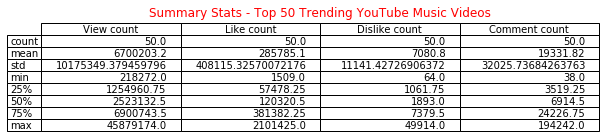

,View count,Like count,Dislike count,Comment count
count,50,50,50,50
mean,"6,700,203","285,785","7,081","19,332"
std,"10,175,349","408,115","11,141","32,026"
min,"218,272","1,509",64,38
25%,"1,254,961","57,478","1,062","3,519"
50%,"2,523,132","120,320","1,893","6,914"
75%,"6,900,744","381,382","7,380","24,227"
max,"45,879,174","2,101,425","49,914","194,242"


In [18]:
stats_summary_df = music_videos_df.describe()

fig = plt.figure(figsize = (10, 2))
ax = fig.add_subplot(111)
ax.table(cellText = stats_summary_df.values,
          rowLabels = stats_summary_df.index,
          colLabels = stats_summary_df.columns,
          loc = "center")
ax.set_title("Summary Stats - Top 50 Trending YouTube Music Videos", color="red")
ax.axis("off")
plt.savefig("Summary_Stats_Table")
plt.show()

stats_summary_df

### In the above statistic summary, we see that the standard deviation is larger than the mean for every variable. This indicates that the data is spread out and not clustered around the mean. 

### This makes sense considering that the top 50 music videos vary greatly in popularity - some have much higher view counts because they have been trending for a longer period of time, while a newly released video might be going viral (and therefore be in the top 50 trending), but still have a low view count. For example, Billie Eilish's newly released "My Future" compared to Taylor Swift's "Cardigan".

## Grouping by Release Date

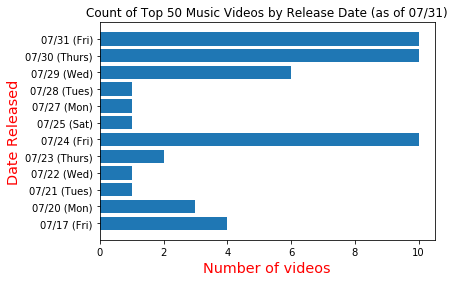

In [19]:
release_date_counts = music_videos_df.groupby(music_videos_df["Release Date"])["Name"].count()
plt.barh(release_date_counts.index, release_date_counts.values)
plt.yticks(ticks= release_date_counts.index, labels=["07/17 (Fri)", "07/20 (Mon)", "07/21 (Tues)", "07/22 (Wed)", 
                                                     "07/23 (Thurs)", "07/24 (Fri)", 
                                                     "07/25 (Sat)", "07/27 (Mon)", "07/28 (Tues)", "07/29 (Wed)",
                                                     "07/30 (Thurs)", "07/31 (Fri)"])
plt.title("Count of Top 50 Music Videos by Release Date (as of 07/31)")
plt.xlabel("Number of videos", color = "red", fontsize = "x-large")
plt.ylabel("Date Released", color = "red", fontsize = "x-large")
plt.show()

### Here we see that the highest percentage of videos in the top 50 are released on either Thursday's or Friday's. This may be due to the fact that many popular artists choose to release albums/singles on these days because it is right before the weekend. This theory would need to be investigated further.

## Export music videos df to csv

In [20]:
music_videos_df.to_csv("Music_Videos.csv")

### NOTE: Needed to export dataframe to csv in order to preserve data from API request made on 07/31, and to manipulate data further on subsequent days without changing data (youtube API is not static, trending videos change hourly)

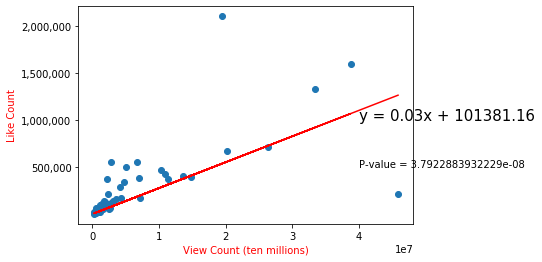

In [54]:
from scipy.stats import linregress
x_axis = music_videos_df["View count"]
y_axis = music_videos_df["Like count"]
plt.scatter(music_videos_df["View count"], music_videos_df["Like count"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_vals = slope * x_axis + slope
plt.plot(x_axis, regress_vals, color = "red")
slope = round(slope, 2)
intercept = round(intercept,2)
plt.annotate(f"y = {slope}x + {intercept}", (40000000, 1000000), fontsize = 15)
plt.annotate(f"P-value = {pvalue}",(40000000, 500000) )
plt.xlabel("View Count (ten millions)", color = "red")
plt.ylabel("Like Count", color = "red")
plt.yticks(ticks = [500000, 1000000,1500000,2000000], labels= ["500,000", "1,000,000", "1,500,000", "2,000,000"])
plt.show()

### We see here that the p-value is extremely close to 0, which is less than the standard alpha = 0.05. Therefore, there is a strong positive correlation between view count and like count for our sample of music videos.

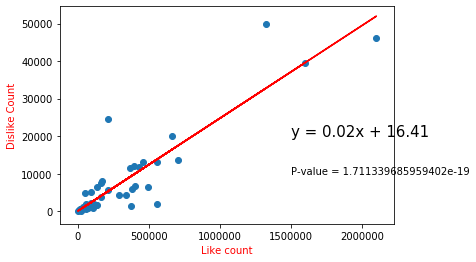

In [66]:
x_axis = music_videos_df["Like count"]
y_axis = music_videos_df["Dislike count"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_vals = slope * x_axis + slope
plt.plot(x_axis, regress_vals, color = "red")
slope = round(slope, 2)
intercept = round(intercept,2)
plt.scatter(x_axis,y_axis)
plt.annotate(f"y = {slope}x + {intercept}", (1500000, 20000), fontsize = 15)
plt.annotate(f"P-value = {pvalue}",(1500000, 10000) )
plt.xlabel("Like count", color = "red")
plt.ylabel("Dislike Count", color = "red")
plt.show()

### We see here that the p-value is extremely close to 0, which is less than the standard alpha = 0.05. Therefore, there is a strong positive correlation between like count and dislike count for our sample of music videos.